# Python Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

# Change Working Directory

In [2]:
import os
os.chdir('F:')

# Read .csv file

In [3]:
datafile = pd.read_csv('MallCustomers.csv')
datafile.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
datafile.shape

(200, 5)

In [5]:
X = datafile.iloc[:,:-1].values

In [6]:
Y = datafile.iloc[:,4]

# Missing Value Detection and Imputation

In [26]:
data = pd.read_csv('Sample_real_estate_data.csv')
print(data['ST_NUM'].isnull())

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


In [27]:
print(data['NUM_BEDROOMS'].isnull())

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


In [71]:
missing_value = ["n/a","na","--"]
data1 = pd.read_csv('Sample_real_estate_data.csv', na_values = missing_value)
data = data1

In [29]:
print(data['NUM_BEDROOMS'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool


In [30]:
print(data['OWN_OCCUPIED'].isnull())

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


In [31]:
count = 0
for row in data['OWN_OCCUPIED']:
    try:
        int(row)
        data.loc[count, 'OWN_OCCUPIED '] = np.nan
    except ValueError:
        pass
    count+=1


In [39]:
print(data['OWN_OCCUPIED'].isnull())

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


In [40]:
print(data.isnull().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64


In [45]:
print(data.isnull().values.any())

True


In [61]:
from sklearn.preprocessing import Imputer

X = data.iloc[:,:-1].values
Y = data.iloc[:,6]
imput = Imputer(missing_values = 'NaN', strategy= 'mean', axis=0)
imput = imput.fit(X[:,1:2])
X[:,1:2] = imput.transform(X[:,1:2])
X[:,1:2]

array([[104.0],
       [197.0],
       [191.42857142857142],
       [201.0],
       [203.0],
       [207.0],
       [191.42857142857142],
       [213.0],
       [215.0]], dtype=object)

In [62]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [72]:
median = data['NUM_BEDROOMS'].median()
data['NUM_BEDROOMS'].fillna(median, inplace=True)
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


# Categorical Variable Encoding

In [145]:
data = pd.read_csv('MallCustomers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [146]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,4].values

In [147]:
from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
X[:,1] = lblencode.fit_transform(X[:,1])
X

array([[1, 1, 19, 15],
       [2, 1, 21, 15],
       [3, 0, 20, 16],
       [4, 0, 23, 16],
       [5, 0, 31, 17],
       [6, 0, 22, 17],
       [7, 0, 35, 18],
       [8, 0, 23, 18],
       [9, 1, 64, 19],
       [10, 0, 30, 19],
       [11, 1, 67, 19],
       [12, 0, 35, 19],
       [13, 0, 58, 20],
       [14, 0, 24, 20],
       [15, 1, 37, 20],
       [16, 1, 22, 20],
       [17, 0, 35, 21],
       [18, 1, 20, 21],
       [19, 1, 52, 23],
       [20, 0, 35, 23],
       [21, 1, 35, 24],
       [22, 1, 25, 24],
       [23, 0, 46, 25],
       [24, 1, 31, 25],
       [25, 0, 54, 28],
       [26, 1, 29, 28],
       [27, 0, 45, 28],
       [28, 1, 35, 28],
       [29, 0, 40, 29],
       [30, 0, 23, 29],
       [31, 1, 60, 30],
       [32, 0, 21, 30],
       [33, 1, 53, 33],
       [34, 1, 18, 33],
       [35, 0, 49, 33],
       [36, 0, 21, 33],
       [37, 0, 42, 34],
       [38, 0, 30, 34],
       [39, 0, 36, 37],
       [40, 0, 20, 37],
       [41, 0, 65, 38],
       [42, 1, 24, 38],
 

## One Hot Encoding

In [148]:
from sklearn.preprocessing import OneHotEncoder
onehotencod = OneHotEncoder(categorical_features = [1])

In [149]:
X = onehotencod.fit_transform(X).toarray()
X

array([[   0.,    1.,    1.,   19.,   15.],
       [   0.,    1.,    2.,   21.,   15.],
       [   1.,    0.,    3.,   20.,   16.],
       [   1.,    0.,    4.,   23.,   16.],
       [   1.,    0.,    5.,   31.,   17.],
       [   1.,    0.,    6.,   22.,   17.],
       [   1.,    0.,    7.,   35.,   18.],
       [   1.,    0.,    8.,   23.,   18.],
       [   0.,    1.,    9.,   64.,   19.],
       [   1.,    0.,   10.,   30.,   19.],
       [   0.,    1.,   11.,   67.,   19.],
       [   1.,    0.,   12.,   35.,   19.],
       [   1.,    0.,   13.,   58.,   20.],
       [   1.,    0.,   14.,   24.,   20.],
       [   0.,    1.,   15.,   37.,   20.],
       [   0.,    1.,   16.,   22.,   20.],
       [   1.,    0.,   17.,   35.,   21.],
       [   0.,    1.,   18.,   20.,   21.],
       [   0.,    1.,   19.,   52.,   23.],
       [   1.,    0.,   20.,   35.,   23.],
       [   0.,    1.,   21.,   35.,   24.],
       [   0.,    1.,   22.,   25.,   24.],
       [   1.,    0.,   23.,   4

# Train Test Split

In [9]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,8].values
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN,NaN


In [10]:
np.set_printoptions(edgeitems=127)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)
X_test = stdscalar.transform(X_test)

# Outlier Detection

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [24]:
boston = pd.DataFrame(boston.data)
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Outlier Detection through Boxplot

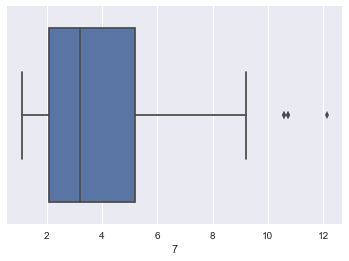

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=boston[7])

In [27]:
# Outlier Detection Part 2
boston_c = boston

## Outlier Detection through Scatter Plot

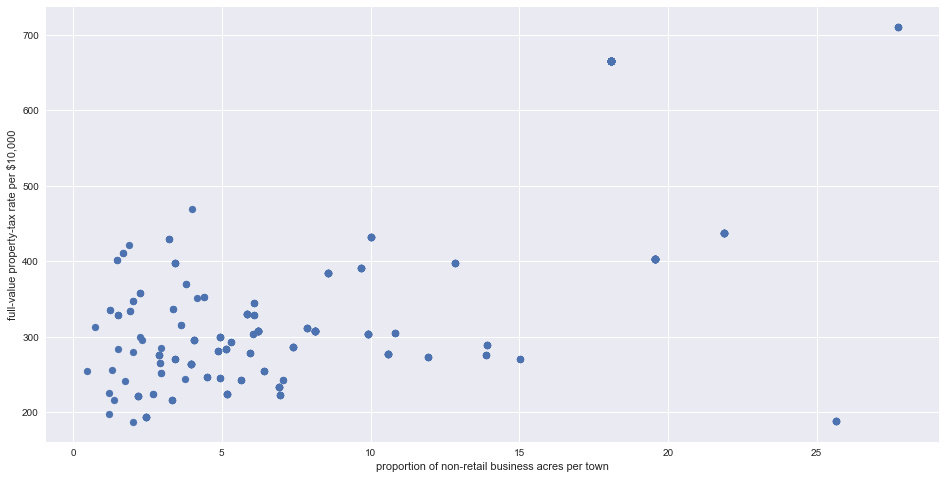

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_c[2], boston_c[9])
ax.set_xlabel('proportion of non-retail business acres per town')
ax.set_ylabel('full-value property-tax rate per $10,000')
plt.show()

## Outlier Detection through Mathematical Method (Z-Score)

In [31]:
from scipy import stats
zscore = np.abs(stats.zscore(boston_c))
print(zscore)

[[ 0.41771335  0.28482986  1.2879095  ...,  1.45900038  0.44105193
   1.0755623 ]
 [ 0.41526932  0.48772236  0.59338101 ...,  0.30309415  0.44105193
   0.49243937]
 [ 0.41527165  0.48772236  0.59338101 ...,  0.30309415  0.39642699
   1.2087274 ]
 ..., 
 [ 0.41137448  0.48772236  0.11573841 ...,  1.17646583  0.44105193
   0.98304761]
 [ 0.40568883  0.48772236  0.11573841 ...,  1.17646583  0.4032249
   0.86530163]
 [ 0.41292893  0.48772236  0.11573841 ...,  1.17646583  0.44105193
   0.66905833]]


In [32]:
threshold = 3
print(np.where(zscore > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [33]:
print(zscore[102][11])

3.13442532791


## Outlier Detection through Mathematical Method (Inter Quartile Range)

In [35]:
boston_iqr = boston
Q1 = boston_iqr.quantile(0.25)
Q3 = boston_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       3.565378
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64


In [40]:
print(boston_iqr < (Q1 - 1.5 * IQR)) | (boston_iqr > (Q3 + 1.5 * IQR))

        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

TypeError: Could not compare [None] with block values

## Handle Outliers/Correct Outliers

In [41]:
boston_clean = boston
boston_clean = boston_clean[(zscore < 3).all(axis=1)]

In [42]:
boston.shape

(506, 13)

In [43]:
boston_clean.shape

(415, 13)

In [46]:
#Remove Outliers using IQR
boston_iqr_clean = boston_iqr[~((boston_iqr < (Q1 - 1.5 * IQR)) | (boston_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
